# Individual Project - Carla Challita

## Credit Card Default 

In [1]:
#Importing the required libraries
library('fastDummies')

# Set environment params
Sys.setenv(LANG='en')  # English

# Import libraries
library(data.table)  # Data manipulate
library(mlr)         # ML toolkit
library(caret)       # ML toolkit
library(ggplot2)     # Visualization
library(pROC)        # AUC, ROC
library(e1071)       # Evaluation
library(gridExtra)   # Visualization
library(kknn)        # kNN model
library(nnet)        # One-vs-All Logistic Regression
library(dummies)     # Data processing
library(tidyverse)
library(MASS)
library(klaR)
library(class)
library(tree)          # CART model
library(randomForest)  # Bagging and RF
library(party)
library(writexl)

Loading required package: ParamHelpers

Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the focus on 'mlr3' there might be
uncaught bugs meanwhile in {mlr} - please consider switching.

Loading required package: ggplot2

Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:mlr':

    train


Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var



Attaching package: 'e1071'


The following object is masked from 'package:mlr':

    impute



Attaching package: 'kknn'


The following object is masked from 'package:caret':

    contr.dummy


dummies-1.5.6 provided by Decision Patterns


-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v tibble  3.1.6     v dplyr   1.

## Pre-processing the data

In [2]:
#Importing the dataset credit_default_
data <- read.csv(file = 'C:/Users/cchallita/Desktop/Uni/Semester 2/Statistical and Machine Learning/Assignments/credit_default_train.csv')

In [3]:
head(data)

cust_id LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4 <U+22EF>       
1 18895    70000    1   3         2        34  0     0     0     0     <U+22EF>
2 25102   390000    2   2         2        26  2     2     2     0     <U+22EF>
3 28867    60000    1   1         2        27  0     0     0     0     <U+22EF>
4  1842   140000    2   2         1        55  0     0     0     0     <U+22EF>
5  3371    50000    1   1         2        29  2     2     2     0     <U+22EF>
6 29925    20000    1   2         2        37  0     0     0     0     <U+22EF>
  BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3 PAY_AMT4 PAY_AMT5
1  25559     26134     26715    1700     1500     2000     1000     1000    
2 140387    128112    115514    5000     3000     5000     4548     4100    
3  26038     28607     27997    1378     1406     3000     3000        0    
4  72391     61298     62193    4200     2822     2336     2588     2250    
5   1047         0         0    3000        0     1000        0        0    
6  19105     19609     19283    1700     1600     1200     1000      900    
  PAY_AMT6 default.payment.next.month
1 2000     0                         
2 3300     0                         
3  923     1                         
4 2491     0                         
5    0     1                         
6 1000     0

In [4]:
data$cust_id <- NULL

In [5]:
#Splitting the dataset into train and test
set.seed(1)
data_split <- sample(nrow(data)*0.80)
train <- data[data_split,]
test <- data[-data_split,]

In [6]:
#Reference: https://www.codingprof.com/how-to-replace-nas-with-the-mode-most-frequent-value-in-r/#:~:text=a%20character%20column.-,To%20replace%20NA%C2%B4s%20with%20the%20mode%20in%20a,function%20that%20returns%20the%20mode.

calc_mode <- function(x){
  
  # List the distinct / unique values
  distinct_values <- unique(x)
  
  # Count the occurrence of each distinct value
  distinct_tabulate <- tabulate(match(x, distinct_values))
  
  # Return the value with the highest occurrence
  distinct_values[which.max(distinct_tabulate)]
}

In [7]:
#The missing values of Sex, Education, Marriage, and Pay will be replaced with the mode of the train dataset.

In [8]:
train$SEX <- ifelse(is.na(train$SEX), calc_mode(train$SEX), train$SEX)
test$SEX <- ifelse(is.na(test$SEX), calc_mode(train$SEX), test$SEX)

In [9]:
train$EDUCATION <- ifelse(is.na(train$EDUCATION), calc_mode(train$EDUCATION), train$EDUCATION)
test$EDUCATION <- ifelse(is.na(test$EDUCATION), calc_mode(train$EDUCATION), test$EDUCATION)

In [10]:
train$MARRIAGE <- ifelse(is.na(train$MARRIAGE), calc_mode(train$MARRIAGE), train$MARRIAGE)
test$MARRIAGE <- ifelse(is.na(test$MARRIAGE), calc_mode(train$MARRIAGE), test$MARRIAGE)

In [11]:
train$PAY_0 <- ifelse(is.na(train$PAY_0), calc_mode(train$PAY_0), train$PAY_0)
test$PAY_0 <- ifelse(is.na(test$PAY_0), calc_mode(train$PAY_0), test$PAY_0)

In [12]:
train$PAY_2 <- ifelse(is.na(train$PAY_2), calc_mode(train$PAY_2), train$PAY_2)
test$PAY_2 <- ifelse(is.na(test$PAY_2), calc_mode(train$PAY_2), test$PAY_2)

In [13]:
train$PAY_3 <- ifelse(is.na(train$PAY_3), calc_mode(train$PAY_3), train$PAY_3)
test$PAY_3 <- ifelse(is.na(test$PAY_3), calc_mode(train$PAY_3), test$PAY_3)

In [14]:
train$PAY_4 <- ifelse(is.na(train$PAY_4), calc_mode(train$PAY_4), train$PAY_4)
test$PAY_4 <- ifelse(is.na(test$PAY_4), calc_mode(train$PAY_4), test$PAY_4)

In [15]:
train$PAY_5 <- ifelse(is.na(train$PAY_5), calc_mode(train$PAY_5), train$PAY_5)
test$PAY_5 <- ifelse(is.na(test$PAY_5), calc_mode(train$PAY_5), test$PAY_5)

In [16]:
train$PAY_6 <- ifelse(is.na(train$PAY_6), calc_mode(train$PAY_6), train$PAY_6)
test$PAY_6 <- ifelse(is.na(test$PAY_6), calc_mode(train$PAY_6), test$PAY_6)

In [17]:
#The missing values of Limit_Bal, Age, Bill_Amt, and Pay_Amt will be replaced with the mean of the train dataset

In [18]:
train$LIMIT_BAL <- ifelse(is.na(train$LIMIT_BAL), round(mean(train$LIMIT_BAL, na.rm = TRUE)), train$LIMIT_BAL)
test$LIMIT_BAL <- ifelse(is.na(test$LIMIT_BAL), round(mean(train$LIMIT_BAL, na.rm = TRUE)), test$LIMIT_BAL)

In [19]:
train$AGE <- ifelse(is.na(train$AGE), round(mean(train$AGE, na.rm = TRUE)), train$AGE)
test$AGE <- ifelse(is.na(test$AGE), round(mean(train$AGE, na.rm = TRUE)), test$AGE)

In [20]:
train$BILL_AMT1 <- ifelse(is.na(train$BILL_AMT1), round(mean(train$BILL_AMT1, na.rm = TRUE)), train$BILL_AMT1)
test$BILL_AMT1 <- ifelse(is.na(test$BILL_AMT1), round(mean(train$BILL_AMT1, na.rm = TRUE)), test$BILL_AMT1)

In [21]:
train$BILL_AMT2 <- ifelse(is.na(train$BILL_AMT2), round(mean(train$BILL_AMT2, na.rm = TRUE)), train$BILL_AMT2)
test$BILL_AMT2 <- ifelse(is.na(test$BILL_AMT2), round(mean(train$BILL_AMT2, na.rm = TRUE)), test$BILL_AMT2)

In [22]:
train$BILL_AMT3 <- ifelse(is.na(train$BILL_AMT3), round(mean(train$BILL_AMT3, na.rm = TRUE)), train$BILL_AMT3)
test$BILL_AMT3 <- ifelse(is.na(test$BILL_AMT3), round(mean(train$BILL_AMT3, na.rm = TRUE)), test$BILL_AMT3)

In [23]:
train$BILL_AMT4 <- ifelse(is.na(train$BILL_AMT4), round(mean(train$BILL_AMT4, na.rm = TRUE)), train$BILL_AMT4)
test$BILL_AMT4 <- ifelse(is.na(test$BILL_AMT4), round(mean(train$BILL_AMT4, na.rm = TRUE)), test$BILL_AMT4)

In [24]:
train$BILL_AMT5 <- ifelse(is.na(train$BILL_AMT5), round(mean(train$BILL_AMT5, na.rm = TRUE)), train$BILL_AMT5)
test$BILL_AMT5 <- ifelse(is.na(test$BILL_AMT5), round(mean(train$BILL_AMT5, na.rm = TRUE)), test$BILL_AMT5)

In [25]:
train$BILL_AMT6 <- ifelse(is.na(train$BILL_AMT6), round(mean(train$BILL_AMT6, na.rm = TRUE)), train$BILL_AMT6)
test$BILL_AMT6 <- ifelse(is.na(test$BILL_AMT6), round(mean(train$BILL_AMT6, na.rm = TRUE)), test$BILL_AMT6)

In [26]:
train$PAY_AMT1 <- ifelse(is.na(train$PAY_AMT1), round(mean(train$PAY_AMT1, na.rm = TRUE)), train$PAY_AMT1)
test$PAY_AMT1 <- ifelse(is.na(test$PAY_AMT1), round(mean(train$PAY_AMT1, na.rm = TRUE)), test$PAY_AMT1)

In [27]:
train$PAY_AMT2 <- ifelse(is.na(train$PAY_AMT2), round(mean(train$PAY_AMT2, na.rm = TRUE)), train$PAY_AMT2)
test$PAY_AMT2 <- ifelse(is.na(test$PAY_AMT2), round(mean(train$PAY_AMT2, na.rm = TRUE)), test$PAY_AMT2)

In [28]:
train$PAY_AMT3 <- ifelse(is.na(train$PAY_AMT3), round(mean(train$PAY_AMT3, na.rm = TRUE)), train$PAY_AMT3)
test$PAY_AMT3 <- ifelse(is.na(test$PAY_AMT3), round(mean(train$PAY_AMT3, na.rm = TRUE)), test$PAY_AMT3)

In [29]:
train$PAY_AMT4 <- ifelse(is.na(train$PAY_AMT4), round(mean(train$PAY_AMT4, na.rm = TRUE)), train$PAY_AMT4)
test$PAY_AMT4 <- ifelse(is.na(test$PAY_AMT4), round(mean(train$PAY_AMT4, na.rm = TRUE)), test$PAY_AMT4)

In [30]:
train$PAY_AMT5 <- ifelse(is.na(train$PAY_AMT5), round(mean(train$PAY_AMT5, na.rm = TRUE)), train$PAY_AMT5)
test$PAY_AMT5 <- ifelse(is.na(test$PAY_AMT5), round(mean(train$PAY_AMT5, na.rm = TRUE)), test$PAY_AMT5)

In [31]:
train$PAY_AMT6 <- ifelse(is.na(train$PAY_AMT6), round(mean(train$PAY_AMT6, na.rm = TRUE)), train$PAY_AMT6)
test$PAY_AMT6 <- ifelse(is.na(test$PAY_AMT6), round(mean(train$PAY_AMT6, na.rm = TRUE)), test$PAY_AMT6)

In [32]:
#Dividing the Age variable into Categories

In [33]:
train$AGE <- ifelse(train$AGE < 30, 'Twenties', ifelse(train$AGE < 40, 'Thirties', ifelse(train$AGE < 50, 'Fourties', ifelse(train$AGE < 60, 'Fifties', 'Sixties_and_Above'))))
test$AGE <- ifelse(test$AGE < 30, 'Twenties', ifelse(test$AGE < 40, 'Thirties', ifelse(test$AGE < 50, 'Fourties', ifelse(test$AGE < 60, 'Fifties', 'Sixties_and_Above'))))

In [34]:
#After checking for outliers, the variables Education and Marriage seem to have outliers which will be replaced with the mode.

In [35]:
train$EDUCATION <- ifelse(train$EDUCATION == 0, calc_mode(train$EDUCATION), ifelse(train$EDUCATION == 5, calc_mode(train$EDUCATION), ifelse(train$EDUCATION == 6, calc_mode(train$EDUCATION), train$EDUCATION)))
test$EDUCATION <- ifelse(test$EDUCATION == 0, calc_mode(train$EDUCATION), ifelse(test$EDUCATION == 5, calc_mode(train$EDUCATION), ifelse(test$EDUCATION == 6, calc_mode(train$EDUCATION), test$EDUCATION)))

In [36]:
train$MARRIAGE <- ifelse(train$MARRIAGE == 0, calc_mode(train$MARRIAGE), train$MARRIAGE)
test$MARRIAGE <- ifelse(test$MARRIAGE == 0, calc_mode(train$MARRIAGE), test$MARRIAGE)

In [37]:
# Scaling the data

train$LIMIT_BAL<-scale(train$LIMIT_BAL)
train$BILL_AMT1<-scale(train$BILL_AMT1)
train$BILL_AMT2<-scale(train$BILL_AMT2)
train$BILL_AMT3<-scale(train$BILL_AMT3)
train$BILL_AMT4<-scale(train$BILL_AMT4)
train$BILL_AMT5<-scale(train$BILL_AMT5)
train$BILL_AMT6<-scale(train$BILL_AMT6)
train$PAY_AMT1<-scale(train$PAY_AMT1)
train$PAY_AMT2<-scale(train$PAY_AMT2)
train$PAY_AMT3<-scale(train$PAY_AMT3)
train$PAY_AMT4<-scale(train$PAY_AMT4)
train$PAY_AMT5<-scale(train$PAY_AMT5)
train$PAY_AMT6<-scale(train$PAY_AMT6)

test$LIMIT_BAL<-scale(test$LIMIT_BAL)
test$BILL_AMT1<-scale(test$BILL_AMT1)
test$BILL_AMT2<-scale(test$BILL_AMT2)
test$BILL_AMT3<-scale(test$BILL_AMT3)
test$BILL_AMT4<-scale(test$BILL_AMT4)
test$BILL_AMT5<-scale(test$BILL_AMT5)
test$BILL_AMT6<-scale(test$BILL_AMT6)
test$PAY_AMT1<-scale(test$PAY_AMT1)
test$PAY_AMT2<-scale(test$PAY_AMT2)
test$PAY_AMT3<-scale(test$PAY_AMT3)
test$PAY_AMT4<-scale(test$PAY_AMT4)
test$PAY_AMT5<-scale(test$PAY_AMT5)
test$PAY_AMT6<-scale(test$PAY_AMT6)

In [38]:
# Get list of categorical variables
var_list <- names(train[, 2:5])

In [39]:
# Convert categorical variables to dummy variables
dummy_list <- list()
for (v in var_list) {
    # Create dummy variables
    tmp <- dummy(v, data=train, sep="_", drop=TRUE)
    # Drop the 1st column
    tmp <- tmp[, 2:ncol(tmp), drop=FALSE]
    # Store the results
    dummy_list[[length(dummy_list)+1]] <- tmp
}

# Combine the dummy variables
dummy_df <- do.call(cbind, dummy_list)

# Add the dummy variables to the data frame
train <- cbind(train, dummy_df)

# Drop the original variable
train <- train[, !(names(train) %in% var_list)]

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"


In [40]:
# Convert categorical variables to dummy variables
dummy_list <- list()
for (v in var_list) {
    # Create dummy variables
    tmp <- dummy(v, data=test, sep="_", drop=TRUE)
    # Drop the 1st column
    tmp <- tmp[, 2:ncol(tmp), drop=FALSE]
    # Store the results
    dummy_list[[length(dummy_list)+1]] <- tmp
}

# Combine the dummy variables
dummy_df <- do.call(cbind, dummy_list)

# Add the dummy variables to the data frame
test <- cbind(test, dummy_df)

# Drop the original variable
test <- test[, !(names(test) %in% var_list)]

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"


In [41]:
names(train)[20] <- 'default'
names(test)[20] <- 'default'

## Applying the models

### Logistic Regression

In [42]:
# Fit Logistic Regression model between default and the other variables
logistic_1 <- glm(default ~ ., data=train, family='binomial')
summary(logistic_1)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = default ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1466  -0.7034  -0.5466  -0.2604   3.5881  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -1.173658   0.086013 -13.645  < 2e-16 ***
LIMIT_BAL             -0.046746   0.028083  -1.665  0.09599 .  
PAY_0                  0.576378   0.024469  23.556  < 2e-16 ***
PAY_2                  0.068575   0.027659   2.479  0.01316 *  
PAY_3                  0.071119   0.031016   2.293  0.02185 *  
PAY_4                  0.046781   0.033713   1.388  0.16525    
PAY_5                  0.019302   0.035836   0.539  0.59015    
PAY_6                  0.014243   0.029959   0.475  0.63450    
BILL_AMT1             -0.436382   0.102336  -4.264 2.01e-05 ***
BILL_AMT2              0.118888   0.126711   0.938  0.34811    
BILL_AMT3              0.345144   0.110829   3.114  0.00184 ** 
BILL_AMT4             -0.104242   

In [43]:
# Perform stepwise for feature selection - reference: https://www.rdocumentation.org/packages/MASS/versions/7.3-56/topics/stepAIC
step.model <- logistic_1 %>% stepAIC(trace = FALSE)
coef(step.model)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

(Intercept)   LIMIT_BAL       PAY_0       PAY_2       PAY_3       PAY_4 
-1.20766600 -0.05507521  0.57949365  0.07036391  0.07313098  0.06778146 
  BILL_AMT1   BILL_AMT3   BILL_AMT4    PAY_AMT1    PAY_AMT2    PAY_AMT4 
-0.38379047  0.41089962 -0.10131265 -0.23531547 -0.42967082 -0.11673982 
   PAY_AMT5       SEX_2 EDUCATION_2 EDUCATION_3 EDUCATION_4  MARRIAGE_2 
-0.10277433 -0.08663623 -0.11107537 -0.09448756 -1.49041726 -0.20741491

In [44]:
# Fitting the model again with the features obtained from the stepwise
logistic_2 <- glm(default ~ LIMIT_BAL + PAY_0 + PAY_2 + PAY_3 + PAY_4 + BILL_AMT1 + BILL_AMT3 + BILL_AMT4 + PAY_AMT1 + PAY_AMT2 + PAY_AMT4 + PAY_AMT5 + SEX_2 + EDUCATION_2 + EDUCATION_3 + EDUCATION_4 + MARRIAGE_2, data=train, family='binomial')
summary(logistic_2)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = default ~ LIMIT_BAL + PAY_0 + PAY_2 + PAY_3 + PAY_4 + 
    BILL_AMT1 + BILL_AMT3 + BILL_AMT4 + PAY_AMT1 + PAY_AMT2 + 
    PAY_AMT4 + PAY_AMT5 + SEX_2 + EDUCATION_2 + EDUCATION_3 + 
    EDUCATION_4 + MARRIAGE_2, family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1065  -0.7023  -0.5471  -0.2646   3.6027  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.20767    0.05329 -22.662  < 2e-16 ***
LIMIT_BAL   -0.05508    0.02739  -2.011  0.04437 *  
PAY_0        0.57949    0.02440  23.753  < 2e-16 ***
PAY_2        0.07036    0.02747   2.561  0.01043 *  
PAY_3        0.07313    0.03083   2.372  0.01770 *  
PAY_4        0.06778    0.02734   2.479  0.01316 *  
BILL_AMT1   -0.38379    0.07296  -5.260 1.44e-07 ***
BILL_AMT3    0.41090    0.09229   4.452 8.50e-06 ***
BILL_AMT4   -0.10131    0.06560  -1.544  0.12248    
PAY_AMT1    -0.23532    0.04774  -4.929 8.27e-07 ***
PAY_AMT2    -0.42967 

In [45]:
# Make prediction on train data
pred_train_prob <- predict(logistic_2, newdata=train, type='response')
head(pred_train_prob)

1017       8004       4775      10369      13218       9725 
0.13412268 0.09203407 0.23710636 0.03231383 0.22975113 0.13272207

In [46]:
# Evaluation model on train
threshold <- 0.5  # Decision threshold
pred_train <- rep('0', length(pred_train_prob))
pred_train[pred_train_prob > threshold] <- '1'

# Accuracy and error rate
acc_log_train <- mean(pred_train == train$default)
print(paste('Accuracy =', round(acc_log_train, 2), '%'))

[1] "Accuracy = 0.81 %"


In [47]:
# Make prediction on test data
pred_test_prob <- predict(logistic_2, newdata=test, type='response')
head(pred_test_prob)

16001     16002     16003     16004     16005     16006 
0.1662467 0.7372551 0.5690189 0.2009152 0.4185550 0.1982523

In [48]:
# Evaluation model on test
threshold <- 0.5  # Decision threshold
pred_test <- rep('0', length(pred_test_prob))
pred_test[pred_test_prob > threshold] <- '1'

# Confusion matrix
print('Confusion matrix:')
table(pred_test, test$default)

# Accuracy and error rate
acc_log_test <- mean(pred_test == test$default)
print(paste('Accuracy =', round(acc_log_test, 2), '%'))

# AUC
pred_roc <- pROC::roc(as.numeric(test$default == "1"), as.numeric(pred_test_prob))
pred_auc_log <- pROC::auc(pred_roc)
print(paste('AUC =', pred_auc_log))

[1] "Confusion matrix:"


         
pred_test    0    1
        0 3016  717
        1   89  178

[1] "Accuracy = 0.8 %"


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC = 0.689185401092129"


In [49]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
lnr_logreg <- makeLearner("classif.logreg", predict.type="prob", fix.factors.prediction=T)

# Define the model
task_logreg <- makeClassifTask(id="train", data=train, target="default")

# Run the k-fold CV
resample(lnr_logreg, task_logreg, rdesc, measures=list(mlr::auc))

Resampling: cross-validation

Measures:             auc       

Functional features have been converted to numerics

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Functional features have been converted to numerics

[Resample] iter 1:    0.7552499 

Functional features have been converted to numerics

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Functional features have been converted to numerics

[Resample] iter 2:    0.7016711 

Functional features have been converted to numerics

Functional features have been converted to numerics

[Resample] iter 3:    0.7098511 

Functional features have been converted to numerics

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Functional features have been converted to numerics

[Resample] iter 4:    0.7327269 

Functional features have been converted to numerics

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Functional feat

Resample Result
Task: train
Learner: classif.logreg
Aggr perf: auc.test.mean=0.7221150
Runtime: 2.13648

### Linear Discriminant Analysis

In [50]:
# Fit LDA model between default and the other variables
lda_1 <- lda(default ~ ., data=train)
lda_1

Call:
lda(default ~ ., data = train)

Prior probabilities of groups:
        0         1 
0.7800625 0.2199375 

Group means:
    LIMIT_BAL      PAY_0      PAY_2      PAY_3      PAY_4      PAY_5      PAY_6
0  0.07876565 -0.2062335 -0.2898806 -0.3060652 -0.3491707 -0.3828219 -0.3994872
1 -0.27936177  0.6510372  0.4512646  0.3677181  0.2537653  0.1591361  0.1023018
    BILL_AMT1    BILL_AMT2    BILL_AMT3    BILL_AMT4    BILL_AMT5    BILL_AMT6
0  0.01034523  0.006739817  0.006213379  0.005535407  0.004954349  0.004103388
1 -0.03669192 -0.023904421 -0.022037280 -0.019632684 -0.017571819 -0.014553676
    PAY_AMT1    PAY_AMT2    PAY_AMT3    PAY_AMT4    PAY_AMT5    PAY_AMT6
0  0.0397880  0.03830673  0.03321184  0.03368206  0.03364844  0.02793976
1 -0.1411179 -0.13586424 -0.11779398 -0.11946171 -0.11934247 -0.09909525
      SEX_2 EDUCATION_2 EDUCATION_3  EDUCATION_4 MARRIAGE_2  MARRIAGE_3
0 0.6163769   0.4818524   0.1570387 0.0049675507  0.5462703 0.009614614
1 0.5751634   0.5143507   0.1841432

In [51]:
# Perform stepwise for feature selection - reference: https://stackoverflow.com/questions/32159649/steplda-without-cross-validation
maxvar <- (4)
direction <- "backward"
tune=data.frame(maxvar,direction)
stepwise_lda <-train(as.factor(default) ~ ., data = train,
method = "stepLDA",
trControl = trainControl(method = "none"),tuneGrid=tune)

 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.

16000 observations of 29 variables in 2 classes; direction: backward

stop criterion: assemble 4 best variables.



correctness rate: 0.81106;  starting variables (29): LIMIT_BAL, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6, SEX_2, EDUCATION_2, EDUCATION_3, EDUCATION_4, MARRIAGE_2, MARRIAGE_3, AGE_Fourties, AGE_Sixties_and_Above, AGE_Thirties, AGE_Twenties 
correctness rate: 0.81156;  out: "AGE_Twenties";  variables (28): LIMIT_BAL, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6, SEX_2, EDUCATION_2, EDUCATION_3, EDUCATION_4, MARRIAGE_2, MARRIAGE_3, AGE_Fourties, AGE_Sixties_and_Above, AGE_Thirties 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00       39.28 



In [52]:
# Fitting again with the features from the stepwise
lda_2 <- lda(default ~ LIMIT_BAL + PAY_0 + PAY_2 + PAY_4 + PAY_5 + PAY_6 + BILL_AMT1 + BILL_AMT2 + BILL_AMT3 + BILL_AMT4 + BILL_AMT5 + BILL_AMT6 + PAY_AMT1 + PAY_AMT2 + PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + PAY_AMT6 + SEX_2 + EDUCATION_2 + EDUCATION_3 + EDUCATION_4 + MARRIAGE_2 + MARRIAGE_3 + AGE_Fourties + AGE_Sixties_and_Above + AGE_Thirties + AGE_Twenties, data=train)
lda_2

Call:
lda(default ~ LIMIT_BAL + PAY_0 + PAY_2 + PAY_4 + PAY_5 + PAY_6 + 
    BILL_AMT1 + BILL_AMT2 + BILL_AMT3 + BILL_AMT4 + BILL_AMT5 + 
    BILL_AMT6 + PAY_AMT1 + PAY_AMT2 + PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + 
    PAY_AMT6 + SEX_2 + EDUCATION_2 + EDUCATION_3 + EDUCATION_4 + 
    MARRIAGE_2 + MARRIAGE_3 + AGE_Fourties + AGE_Sixties_and_Above + 
    AGE_Thirties + AGE_Twenties, data = train)

Prior probabilities of groups:
        0         1 
0.7800625 0.2199375 

Group means:
    LIMIT_BAL      PAY_0      PAY_2      PAY_4      PAY_5      PAY_6
0  0.07876565 -0.2062335 -0.2898806 -0.3491707 -0.3828219 -0.3994872
1 -0.27936177  0.6510372  0.4512646  0.2537653  0.1591361  0.1023018
    BILL_AMT1    BILL_AMT2    BILL_AMT3    BILL_AMT4    BILL_AMT5    BILL_AMT6
0  0.01034523  0.006739817  0.006213379  0.005535407  0.004954349  0.004103388
1 -0.03669192 -0.023904421 -0.022037280 -0.019632684 -0.017571819 -0.014553676
    PAY_AMT1    PAY_AMT2    PAY_AMT3    PAY_AMT4    PAY_AMT5    PAY_AMT6
0 

In [53]:
# Predict and evaluate on train data
lda_pred_train <- predict(lda_2, newdata=train)

# Accuracy
acc_lda_train <- mean(lda_pred_train$class == train$default)
print(paste('Accuracy =', round(acc_lda_train, 2), '%'))

[1] "Accuracy = 0.81 %"


In [54]:
# Predict and evaluate on test data
lda_pred_test <- predict(lda_2, newdata=test)

# Confusion matrix
print('Confusion matrix:')
table(lda_pred_test$class, test$default)

# Accuracy
acc_lda_test <- mean(lda_pred_test$class == test$default)
print(paste('Accuracy =', round(acc_lda_test, 2), '%'))

# AUC
pred_auc_lda <- pROC::auc(test$default, lda_pred_test$posterior[,2])
print(paste('AUC =', pred_auc_lda))

[1] "Confusion matrix:"


   
       0    1
  0 3006  685
  1   99  210

[1] "Accuracy = 0.8 %"


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC = 0.683089808292626"


In [55]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
lnr_logreg <- makeLearner("classif.lda", predict.type="prob", fix.factors.prediction=T)

# Define the model
task_logreg <- makeClassifTask(id="train", data=train, target="default")

# Run the k-fold CV
resample(lnr_logreg, task_logreg, rdesc, measures=list(mlr::auc))

Resampling: cross-validation

Measures:             auc       

Functional features have been converted to numerics

Functional features have been converted to numerics

[Resample] iter 1:    0.7288758 

Functional features have been converted to numerics

Functional features have been converted to numerics

[Resample] iter 2:    0.7003557 

Functional features have been converted to numerics

Functional features have been converted to numerics

[Resample] iter 3:    0.7024114 

Functional features have been converted to numerics

Functional features have been converted to numerics

[Resample] iter 4:    0.6991613 

Functional features have been converted to numerics

Functional features have been converted to numerics

[Resample] iter 5:    0.7228085 

Functional features have been converted to numerics

Functional features have been converted to numerics

[Resample] iter 6:    0.7130630 

Functional features have been converted to numerics

Functional features have been converted to 

Resample Result
Task: train
Learner: classif.lda
Aggr perf: auc.test.mean=0.7142896
Runtime: 1.86197

### K-Nearest Neighbors

In [56]:
# Fit KNN model k=2
knn_1 <- knn(train=train, test=test, cl=train$default, k=2)
summary(knn_1)

0    1 
3225  775

In [57]:
# Get the optimal K for the model - reference: https://rpubs.com/njvijay/16444
set.seed(123)
ctrl <- trainControl(method="repeatedcv", repeats = 3) 
knnFit <- train(default ~ ., data = train, method = "knn", trControl = ctrl, preProcess = c("center","scale"), tuneLength = 20)
print(knnFit)

Warning message in train.default(x, y, weights = w, ...):
"You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column."


k-Nearest Neighbors 

16000 samples
   29 predictor

Pre-processing: centered (29), scaled (29) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 14400, 14400, 14400, 14400, 14400, 14400, ... 
Resampling results across tuning parameters:

  k   RMSE       Rsquared   MAE      
   5  0.4049782  0.1087218  0.2738617
   7  0.3955752  0.1228012  0.2740315
   9  0.3907095  0.1315646  0.2745891
  11  0.3875077  0.1388910  0.2745915
  13  0.3855629  0.1435449  0.2747285
  15  0.3844562  0.1461281  0.2752373
  17  0.3832400  0.1497312  0.2751020
  19  0.3826333  0.1514926  0.2751959
  21  0.3824852  0.1515631  0.2755991
  23  0.3820797  0.1527881  0.2758007
  25  0.3817293  0.1538988  0.2760535
  27  0.3814535  0.1548511  0.2761758
  29  0.3813678  0.1550990  0.2763144
  31  0.3811266  0.1560588  0.2763255
  33  0.3809069  0.1570061  0.2762716
  35  0.3808352  0.1573025  0.2764397
  37  0.3806459  0.1581195  0.2764669
  39  0.3804398  0.1590353  0.2765351
  41  

In [58]:
# Fit KNN again with k = 41
knn_2 <- knn(train=train, test=test, cl=train$default, k=41)
summary(knn_2)

0    1 
3439  561

In [59]:
# k = 41
set.seed(123)
knn_2 <- knn(train=train,
                 test=test,
                 cl=train$default,
                 k=41, prob = TRUE)

In [81]:
# Confusion matrix, accuracy, and AUC of test

# Confusion matrix
print('Confusion matrix:')
table(knn_2, test$default)

# Accuracy
acc_knn_train <- mean(knn_2 == test$default)
print(paste('Accuracy =', round(acc_knn_train, 2), '%'))

# AUC
pred_roc_knn <- pROC::roc(as.numeric(test$default == 1), as.numeric(knn_2))
pred_auc_knn <- pROC::auc(pred_roc_knn)
print(paste('AUC =', pred_auc_knn))

[1] "Confusion matrix:"


     
knn_2    0    1
    0 3045  394
    1   60  501

[1] "Accuracy = 0.89 %"


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC = 0.770226432407632"


In [83]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
lnr_knn <- makeLearner("classif.kknn", predict.type="prob", fix.factors.prediction=T, k=41)

# Define the task
task_logreg <- makeClassifTask(id="train", data=train, target="default")

# Run the k-fold CV
resample(lnr_knn, task_logreg, rdesc, measures=list(mlr::auc))

Resampling: cross-validation

Measures:             auc       

Functional features have been converted to numerics

Functional features have been converted to numerics

[Resample] iter 1:    0.7432980 

Functional features have been converted to numerics

Functional features have been converted to numerics

[Resample] iter 2:    0.7449205 

Functional features have been converted to numerics

Functional features have been converted to numerics

[Resample] iter 3:    0.7161975 

Functional features have been converted to numerics

Functional features have been converted to numerics

[Resample] iter 4:    0.7265246 

Functional features have been converted to numerics

Functional features have been converted to numerics

[Resample] iter 5:    0.7147165 

Functional features have been converted to numerics

Functional features have been converted to numerics

[Resample] iter 6:    0.7157288 

Functional features have been converted to numerics

Functional features have been converted to 

Resample Result
Task: train
Learner: classif.kknn
Aggr perf: auc.test.mean=0.7316685
Runtime: 20.701

### Decision Tree

In [63]:
# Build simple decision tree model from train
tree_1 <- tree(default ~ ., data=train)
tree_1

node), split, n, deviance, yval
      * denotes terminal node

1) root 16000 2745.0 0.2199  
  2) PAY_0 < 1.5 14345 1986.0 0.1660  
    4) PAY_2 < 1.5 13150 1625.0 0.1444  
      8) PAY_AMT3 < -0.285236 3533  612.8 0.2233 *
      9) PAY_AMT3 > -0.285236 9617  981.9 0.1154 *
    5) PAY_2 > 1.5 1195  287.6 0.4033 *
  3) PAY_0 > 1.5 1655  355.5 0.6876 *

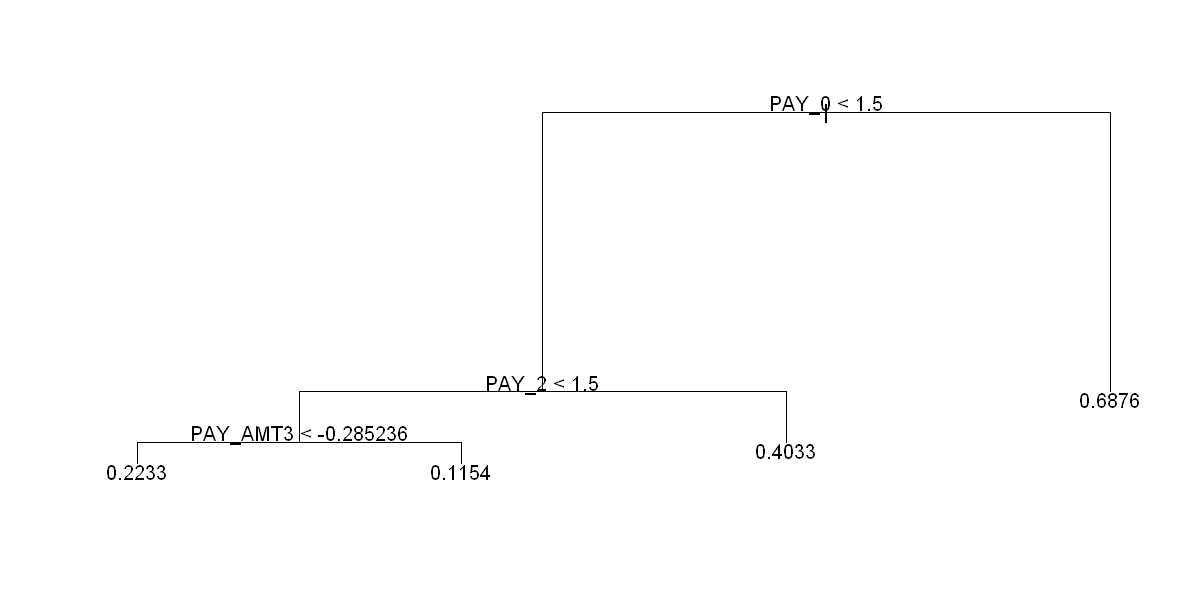

In [64]:
# Plot the tree
options(repr.plot.width=10, repr.plot.height=5)
par(cex.lab=0.8, cex.axis=0.8, cex.main=0.8, cex.sub=0.8)
plot(tree_1)  # Plot the tree
text(tree_1, pretty=1)  # Add text

In [65]:
# Applying gridsearch for hyperparameter tuning
tree.c = train(form = default ~ ., data = train, method = 'ctree')
tree.c

Warning message in train.default(x, y, weights = w, ...):
"You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column."


Conditional Inference Tree 

16000 samples
   29 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 16000, 16000, 16000, 16000, 16000, 16000, ... 
Resampling results across tuning parameters:

  mincriterion  RMSE       Rsquared   MAE      
  0.01          0.4228589  0.1033774  0.2678962
  0.50          0.3883530  0.1533198  0.2681172
  0.99          0.3727992  0.1936956  0.2730247

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mincriterion = 0.99.

In [66]:
# Fitting the model again with mincriterion = 0.99 - reference: http://www.sthda.com/english/articles/35-statistical-machine-learning-essentials/141-cart-model-decision-tree-essentials/

set.seed(123)
tree_2 <- train(
  as.factor(default) ~., data = train, method = "ctree",
  trControl = trainControl("cv", number = 10),
  tuneGrid = expand.grid(mincriterion = 0.99)
  )

In [68]:
# Make the prediction on train
pred_train = tree_2 %>% predict(train)

# Accuracy
print(paste0('Accuracy = ', mean(pred_train == train$default)))

[1] "Accuracy = 0.818875"


In [77]:
# Make the prediction on test
pred_test = tree_2 %>% predict(test)

# Evaluation: confusion matrix
table(pred_test, test$default)

# Accuracy
print(paste0('Accuracy = ', mean(pred_test == test$default)))

# AUC
pred_r_test <- pROC::roc(as.numeric(test$default == 1), as.numeric(pred_test))
pred_auc_dt <- pROC::auc(pred_r_test)
print(paste('AUC =', pred_auc_dt))

         
pred_test    0    1
        0 2978  633
        1  127  262

[1] "Accuracy = 0.81"


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC = 0.625917829415522"


### Random Forest

In [70]:
# Fit bagging model, use all predictors
bagtree_1 <- randomForest(default ~ ., data=train, mtry=13, importance=T)
bagtree_1

Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"



Call:
 randomForest(formula = default ~ ., data = train, mtry = 13,      importance = T) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 13

          Mean of squared residuals: 0.1386609
                    % Var explained: 19.18

In [71]:
# Feature importance
importance(bagtree_1)

%IncMSE    IncNodePurity
LIMIT_BAL              28.258132 152.640298   
PAY_0                 137.588897 325.332591   
PAY_2                  39.544286 124.884625   
PAY_3                  34.127760  68.442752   
PAY_4                  31.314221  51.366731   
PAY_5                  27.483320  34.781258   
PAY_6                  37.805803  34.958476   
BILL_AMT1              32.618046 168.300114   
BILL_AMT2              47.305004 133.187253   
BILL_AMT3              48.926316 125.921444   
BILL_AMT4              49.971135 122.649810   
BILL_AMT5              41.045527 122.794246   
BILL_AMT6              41.107341 129.186976   
PAY_AMT1               33.332711 135.147262   
PAY_AMT2               31.561391 125.924951   
PAY_AMT3               35.533357 126.299415   
PAY_AMT4               33.795583 115.943926   
PAY_AMT5               39.694062 120.254922   
PAY_AMT6               26.315196 124.373717   
SEX_2                   1.868022  25.883665   
EDUCATION_2             2.476166  24.262898   
EDUCATION_3             4.202570  21.082591   
EDUCATION_4            -2.114972   1.179994   
MARRIAGE_2              4.280368  23.885845   
MARRIAGE_3              1.454764   6.303063   
AGE_Fourties            2.490416  19.916975   
AGE_Sixties_and_Above   6.375883   8.393329   
AGE_Thirties            5.962889  22.090952   
AGE_Twenties            8.369637  21.444008

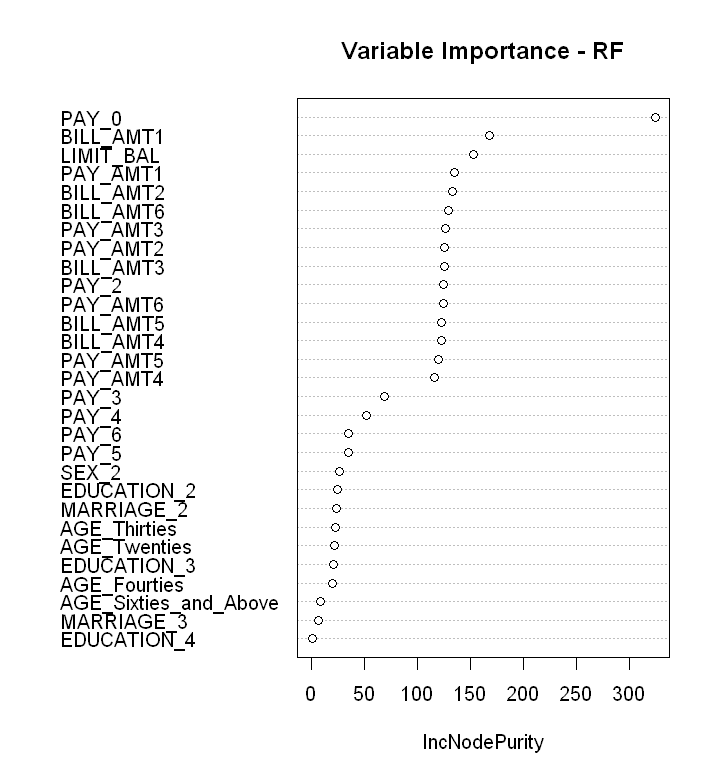

In [72]:
# Plot feature importance
options(repr.plot.width=6, repr.plot.height=6.5)
varImpPlot(bagtree_1, type=2, main='Variable Importance - RF')

In [73]:
# Fitting the model again with the most important features
bagtree_2 <- randomForest(as.factor(default) ~ PAY_AMT4 + PAY_AMT5 + BILL_AMT4 + BILL_AMT5 + PAY_AMT6 + PAY_2 + BILL_AMT3 + PAY_AMT2 + PAY_AMT3 + BILL_AMT6 + BILL_AMT2 + PAY_AMT1 + LIMIT_BAL + BILL_AMT1 + PAY_0, data=train, mtry=13, importance=T)
bagtree_2


Call:
 randomForest(formula = as.factor(default) ~ PAY_AMT4 + PAY_AMT5 +      BILL_AMT4 + BILL_AMT5 + PAY_AMT6 + PAY_2 + BILL_AMT3 + PAY_AMT2 +      PAY_AMT3 + BILL_AMT6 + BILL_AMT2 + PAY_AMT1 + LIMIT_BAL +      BILL_AMT1 + PAY_0, data = train, mtry = 13, importance = T) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 13

        OOB estimate of  error rate: 18.51%
Confusion matrix:
      0    1 class.error
0 11734  747  0.05985097
1  2215 1304  0.62944018

In [74]:
# Make prediction on train
pred_2_train <- predict(bagtree_2, newdata=train)

# Accuracy
print(paste0('Accuracy = ', mean(pred_2_train == train$default)))

[1] "Accuracy = 0.9925"


In [78]:
# Make prediction on test
pred_2_test <- predict(bagtree_2, newdata=test)

# Accuracy
print(paste0('Accuracy = ', mean(pred_2_test == test$default)))

# AUC
pred_roc <- pROC::roc(as.numeric(test$default == 1), as.numeric(pred_2_test))
pred_auc_rf <- pROC::auc(pred_roc)

print(paste('AUC =', pred_auc_rf))

[1] "Accuracy = 0.81025"


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC = 0.623295459656888"


In [76]:
# Exporting the train and test sets
write_xlsx(train,"C:/Users/cchallita/Desktop/Uni/Semester 2/Statistical and Machine Learning/Assignments/Individual Project/train.xlsx")
write_xlsx(test,"C:/Users/cchallita/Desktop/Uni/Semester 2/Statistical and Machine Learning/Assignments/Individual Project/test.xlsx")